# Lista de Exercícios 2 - Elementos de Processamento de Imagens

Prof. Gilson Antonio Giraldi \
Aluno Lorran de Araújo Durães Soares \
Questão 3

3 - Escolha uma base de imagens 𝐷 e converta as imagens para escala de cinza. Separe 𝐷 em dois subconjuntos disjuntos 𝐷𝑡𝑟 e 𝐷𝑡𝑒. 

(a) Calcule o ‘PCA para problemas com pequeno número de amostras’ sobre 𝐷𝑡𝑟. 

(b) Estude o espectro da matriz 𝑅=(1/𝑁)𝑋^TX para realizar a redução de dimensionalidade. 

(c) Aplique o PCA sobre 𝐷𝑡𝑒 e compare a eficiência de compressão com a DCT.

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
np.random.seed(42)
random.seed(42)
from funcoes import PCAAnalysis

In [2]:
image_dir = './fei-database/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  

images = np.array(images)
images.shape

(400, 360, 260, 3)

In [3]:
def pre_processamento(images):
    # deixa em tom de cinza
    images_preproces = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

    # vetoriza
    images_preproces = images_preproces.reshape(images.shape[0], -1)

    # # normaliza
    # images_preproces = images_preproces / np.linalg.norm(images_preproces, axis=0)

    return images_preproces

In [4]:
images_preproces = pre_processamento(images)
images_preproces.shape

(400, 93600)

In [6]:
data_train, data_test = train_test_split(images_preproces, test_size=0.2, shuffle=True)

In [7]:
pca_small_size = PCAAnalysis(data_train)

In [8]:
pca_small_size.fit();

Número de componentes que representam 95% da variância dos dados: 101


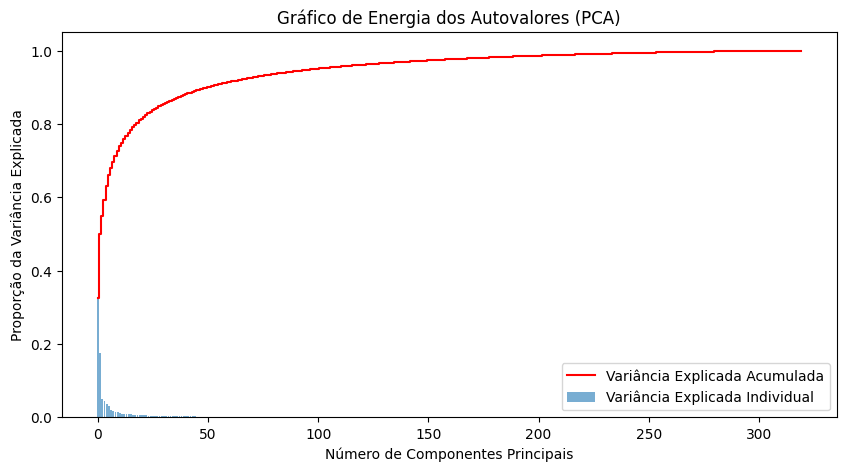

In [9]:
pca_small_size.plot_explained_variance()

In [10]:
pca_small_size.truncate();

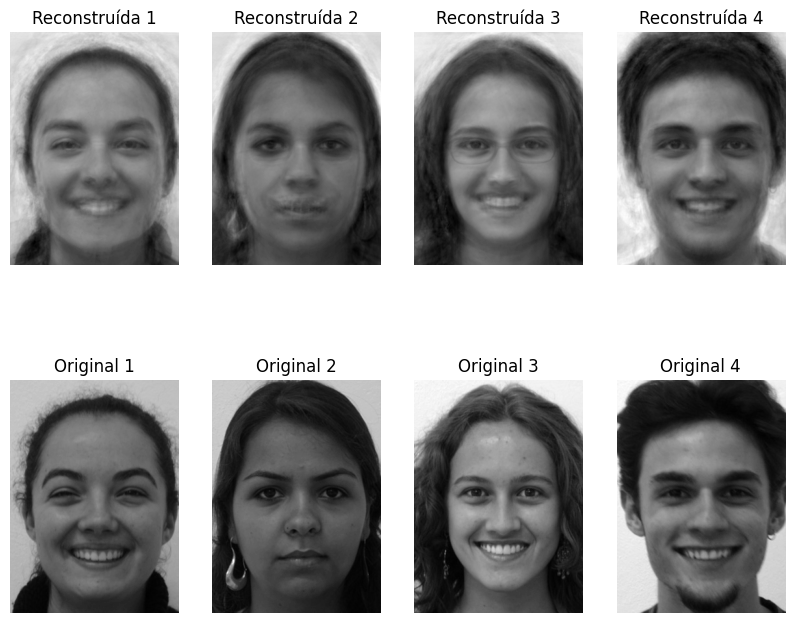

(80, 93600)

In [12]:
data_test_transformed = pca_small_size.transform(data_test)

data_test_reconstructed = pca_small_size.reconstrucion_images(data_test, data_test_transformed)

data_test_reconstructed.shape